In [80]:
#histogram analysis for image processing
# frequency distribution of these intensity values that occurs in an image

from skimage import io
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import pywt

In [ ]:
# assignment task 
# 1 -> histogram analysis (grayscale, colorImg)
# 2 -> histogram equalization
# 3 -> filtering (blurFilter, medianFilter)
# 4 -> weblet

In [32]:
# img load
img = io.imread("./images/grayimages.jpg")
img2 = io.imread("./images/grayimages-2.jpg")
img3 = io.imread("./images/road.jpg") #for colorImage
img4 = io.imread("./images/line-detection-4.jpg")
img5 = io.imread("./images/flower.jpg",0)

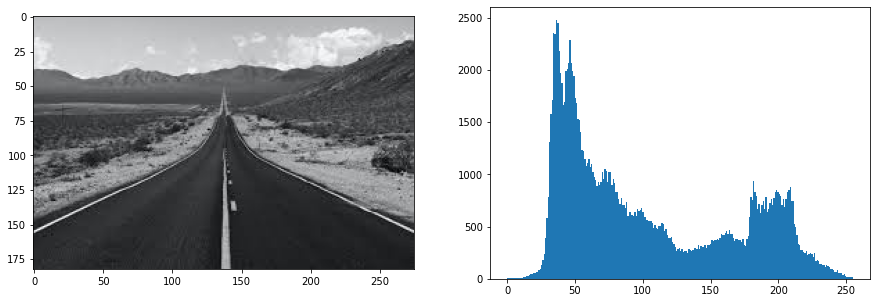

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax1.imshow(img)
ax2 = plt.hist(img.ravel(),bins=256)
# ravel -> converting 2d to 1d array
plt.show()

In [24]:
# ex-2
# fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
# ax1.imshow(img4)
# ax2 = plt.hist(img4.ravel(),bins=256)
# # ravel -> converting 2d to 1d array
# plt.xlabel("intensity")
# plt.ylabel("count")
# plt.show()

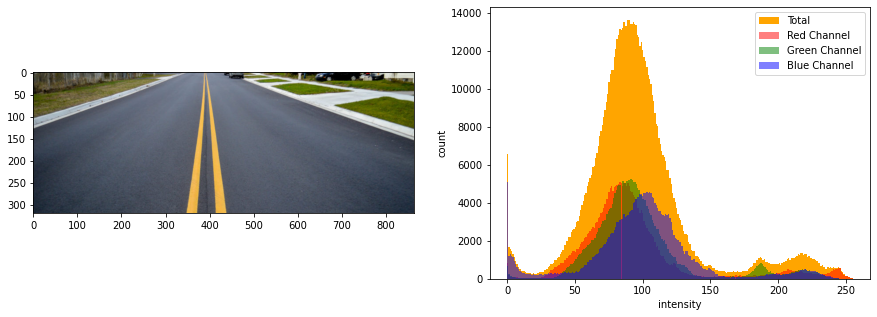

In [20]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax1.imshow(img3)

ax2 = plt.hist(img3.ravel(),bins=256, color="orange")
ax2 = plt.hist(img3[:,:,0].ravel(),bins=256, color="red", alpha=0.5)
ax2 = plt.hist(img3[:,:,1].ravel(),bins=256, color="green", alpha=0.5)
ax2 = plt.hist(img3[:,:,2].ravel(),bins=256, color="blue", alpha=0.5)
# ravel -> converting 2d to 1d array
plt.xlabel("intensity")
plt.ylabel("count")
ax2 = plt.legend(['Total',"Red Channel","Green Channel","Blue Channel"])
plt.show()

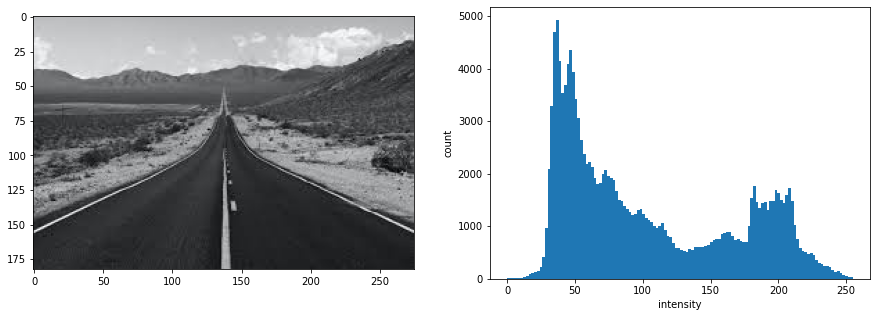

In [26]:
#bining
# fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
# ax1.imshow(img)
# ax2 = plt.hist(img.ravel(),bins=128)
# # ravel -> converting 2d to 1d array
# plt.xlabel("intensity")
# plt.ylabel("count")
# plt.show()

In [ ]:
# histogram equlization
# adjusts the contrast of an image by using its histogram. 
# To enhance the image’s contrast, it spreads out the most frequent pixel intensity values 
# or stretches out the intensity range of the image
# high contrast -> high intensity of brightness


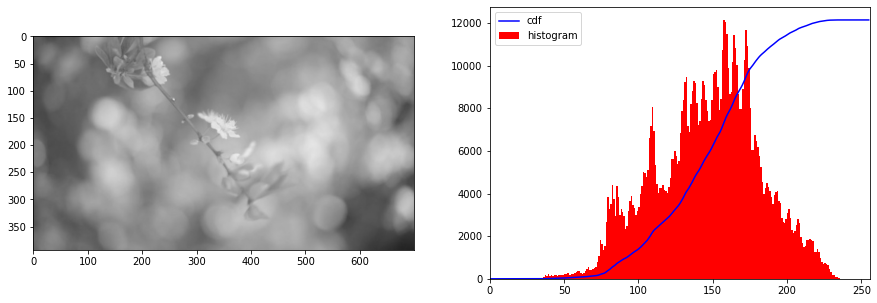

In [29]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax1.imshow(img5)
hist,bins = np.histogram(img5.flatten(),256,[0,256]) 
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img5.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [40]:
img6 = cv.imread('./images/flower.jpg',0) #load img

equ = cv.equalizeHist(img6)
# res = np.hstack((img6,equ)) #stacking images side-by-side
cv.imwrite('./images/res.png',equ)

# create a *CLAHE object (Arguments are optional).
# CLAHE (Contrast Limited Adaptive Histogram Equalization)

clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img6)
cv.imwrite('./images/res-2.png',cl1)

True

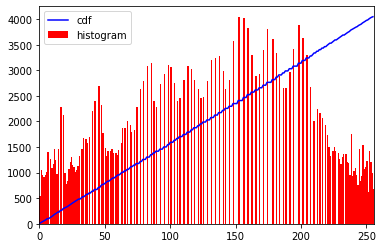

In [63]:
hist,bins = np.histogram(equ.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized , color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Text(0.5, 1.0, 'CLAH Image')

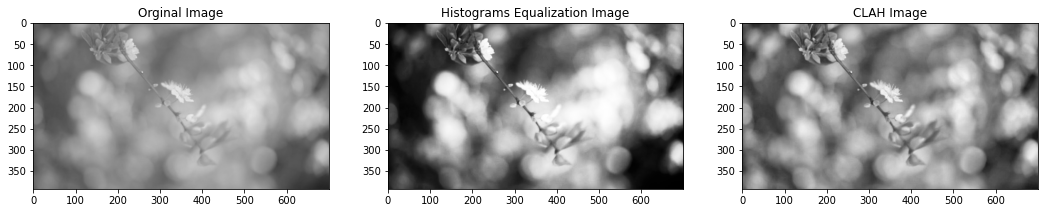

In [62]:
# e = io.imshow(equ)
orgImg = cv.imread('./images/flower.jpg')
equImg = cv.imread('./images/res.png')
clahImg = cv.imread('./images/res-2.png')

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 8))
ax1.imshow(orgImg)
ax1.set_title("Orginal Image")

ax2.imshow(equImg)
ax2.set_title("Histograms Equalization Image")

ax3.imshow(clahImg)
ax3.set_title("CLAH Image")



# io.imshow(cl1)

In [61]:
# io.imshow(img6)
# io.imshow(equ)
# io.imshow(cl1)


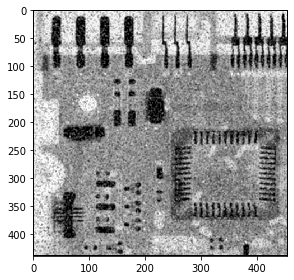

In [67]:
# Image Filtering

# Low Pass SPatial Domain Filtering
# to observe the blurring effect

img7 = cv.imread('./images/input filter.png', 0)

# Obtain number of rows and columns of the image
m, n = img7.shape

# Develop Averaging filter(3, 3) mask
mask = np.ones([3, 3], dtype = int)
mask = mask / 9

# Convolve the 3X3 mask over the image 
img_new = np.zeros([m, n])

for i in range(1, m-1):
    for j in range(1, n-1):
        temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
         
        img_new[i, j]= temp
          
img_new = img_new.astype(np.uint8)
cv.imwrite('./images/blurred.png', img_new)
io.imshow('./images/blurred.png')

In [72]:

 #Using opencv to provide functions to achieve mean filtering
# blur_img = cv.blur(img, (3, 3))
# io.imshow(blur_img)

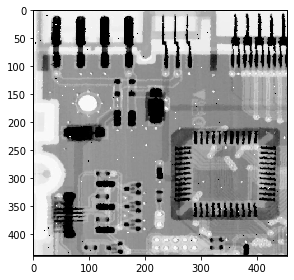

In [71]:
# Median Spatial Domain Filtering
# based on the theory of sorting statistics that can effectively suppress noise
# salt-and-pepper noise (which refers to sparsely occurring white and black pixels) 
# is caused by sudden disturbances in an image signal


# Obtain the number of rows and columns of the image
img_noisy1 = cv.imread('./images/input filter.png', 0)
m, n = img_noisy1.shape

# Traverse the image. For every 3X3 area, find the median of the pixels and
# replace the ceter pixel by the median
img_new1 = np.zeros([m, n])

for i in range(1, m-1):
    for j in range(1, n-1):
        temp = [img_noisy1[i-1, j-1],
               img_noisy1[i-1, j],
               img_noisy1[i-1, j + 1],
               img_noisy1[i, j-1],
               img_noisy1[i, j],
               img_noisy1[i, j + 1],
               img_noisy1[i + 1, j-1],
               img_noisy1[i + 1, j],
               img_noisy1[i + 1, j + 1]]
          
        temp = sorted(temp)
        img_new1[i, j]= temp[4]
        
img_new1 = img_new1.astype(np.uint8)
cv.imwrite('./images/new_median_filtered.png', img_new1)
io.imshow(img_new1)

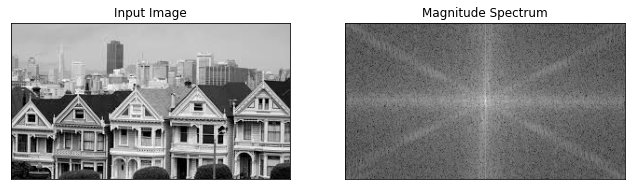

In [78]:
img8 = cv.imread("./images/SanFrancisco.jpg",0)

dft = cv.dft(np.float32(img8),flags = cv.DFT_COMPLEX_OUTPUT)

# shift the zero-frequncy component to the center of the spectrum
dft_shift = np.fft.fftshift(dft)

# save image of the image in the fourier domain.
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

# plot both images
plt.figure(figsize=(11,6))
plt.subplot(121),plt.imshow(img8, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

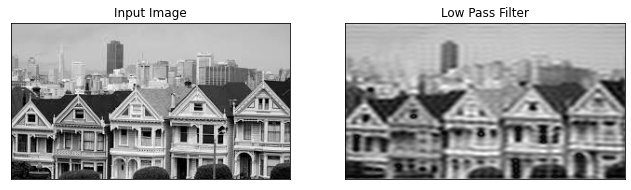

In [79]:
rows, cols = img8.shape
crow,ccol = rows//2 , cols//2

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])

# plot both images
plt.figure(figsize=(11,6))
plt.subplot(121),plt.imshow(img8, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Low Pass Filter'), plt.xticks([]), plt.yticks([])
plt.show()

In [82]:
#  weblet
#  A Wavelet is a wave-like oscillation that is localized in time(scale and location)
# Wavelet analysis is similar to Fourier analysis in that it allows a target function
# over an interval to be represented in terms of an orthonormal basis.

img9=cv.imread("./images/test-1.png",0)

#Haar wavelet transform for IMG, the variables are low frequencies, horizontal high frequency, vertical high frequency, diagonal high frequency
cA,(cH,cV,cD)=pywt.dwt2(img9,"haar") #square shaping
print(cA)

# After the wavelet transform, the image corresponding to the low frequency component
cv.imwrite('./images/test-1-low.png',np.uint8(cA/np.max(cA)*255))

# After the wavelet transform, the image corresponding to the high frequency component in the horizontal direction
cv.imwrite('./images/test-1-high.png',np.uint8(cH/np.max(cH)*255))

# After the wavelet transform, the image corresponding to the high frequency component in the vertical direction.
cv.imwrite('./images/test-1-vertical.png',np.uint8(cV/np.max(cV)*255))

# After the wavelet transform, the image corresponding to the high frequency component in the diagonal direction.
cv.imwrite('./images/test-1-d.png',np.uint8(cD/np.max(cD)*255))
#                

rimg=pywt.idwt2((cA,(cH,cV,cD)),"haar")
cv.imwrite("./images/rimg.png",np.uint8(rimg))



[[126.  167.  112.5 ... 220.  222.5 187.5]
 [114.5 163.5 106.  ... 217.  243.5 200. ]
 [125.  160.5 113.  ... 206.5 253.5 195.5]
 ...
 [329.5 334.  328.  ...  59.   45.5  62. ]
 [328.5 329.5 330.5 ...  62.   56.   59. ]
 [330.  329.5 326.5 ...  59.   68.   65. ]]


True

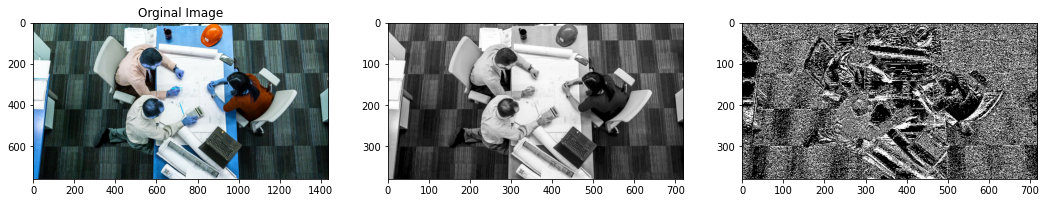

In [89]:
# e = io.imshow(equ)
orgImg = cv.imread('./images/test-1.png')
lowImg = cv.imread('./images/test-1-low.png')
highImg = cv.imread('./images/test-1-high.png')
vertImg = cv.imread('./images/test-1-vertical.png')
diagImg = cv.imread('./images/test-1-d.png')
outputImg = cv.imread('./images/rimg.png')

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 8))
ax1.imshow(orgImg)
ax1.set_title("Orginal Image")

ax2.imshow(lowImg)
# ax2.set_title("")

ax3.imshow(highImg)
# ax3.set_title("")

# ax4.imshow(vertImg)
# # ax4.set_title("")

# ax5.imshow(diagImg)
# # ax5.set_title("")

# ax6.imshow(outputImg)
# # ax6.set_title("")